In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [2]:
ratings_ba = pd.read_csv('Data/ratings_ba.csv')
ratings_ba

,beer_name,beer_id,date,user_name,user_id,overall,text
0,Régab,142544,1440064800,nmann08,nmann08.184925,3.0,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,1235127600,StJamesGate,stjamesgate.163714,3.5,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,1142247600,mdagnew,mdagnew.19527,3.5,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,1101898800,helloloser12345,helloloser12345.10867,4.5,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,1093860000,cypressbob,cypressbob.3708,4.0,"500ml bottlePours with a light, slightly hazy ..."
...,...,...,...,...,...,...,...
2672671,Irvington Pale Ale,19141,1100516400,ecoboy,ecoboy.1641,3.5,"It may say APA on this site, but talking to th..."
2672672,Kölsch Ale,19139,1141038000,jaluria,jaluria.31362,4.0,I'll start off reviewing this beer with the fo...
2672673,Kölsch Ale,19139,1140346800,Dithyramb,dithyramb.4413,3.0,Served on draft at the pub. Poured a clear yel...
2672674,Kölsch Ale,19139,1092132000,ManekiNeko,manekineko.2654,1.5,Served on tap at the brewpub in a pint glass.A...


In [3]:
ratings_rb = pd.read_csv('Data/ratings_rb.csv')
ratings_rb

,beer_name,beer_id,date,user_name,user_id,overall,text
0,33 Export (Gabon),410549,1461664800,Manslow,175852,8,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,1487329200,MAGICuenca91,442761,8,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,1466762400,Sibarh,288889,5,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,1451646000,fombe89,250510,5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,1445594400,kevnic2008,122778,7,Many thanks for this beer to Erzengel. Pours l...
...,...,...,...,...,...,...,...
7122069,Svejk Blonde,220897,1411034400,Travlr,83882,10,"Draft at the source. Clear golden color, fluff..."
7122070,Svejk Blonde,220897,1385895600,TBone,10233,10,"Tap @brewpub, TiraneClear golden color, good c..."
7122071,Svejk Dark,220898,1415098800,Rob_D_UK,257161,9,In their beer garden after a walking tour arou...
7122072,Svejk Dark,220898,1410861600,Travlr,83882,6,"Draft at the source. Hazy maroon color, tan he..."


<AxesSubplot:>

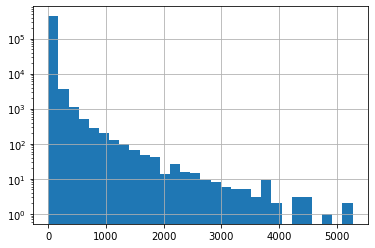

In [19]:
beers = pd.read_csv('Data/RateBeer/beers.csv')
beers['nbr_ratings'].hist(log=True, bins=30 )

In [ ]:
# ratings = pd.read_csv('Data/ratings.csv')
# ratings

<ipython-input-17-34436f456faf>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv('Data/ratings.csv')


# Ratings distribution

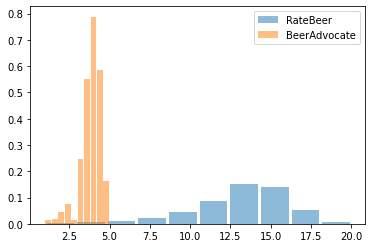

In [4]:
plt.hist(ratings_rb['overall'], density=True, label='RateBeer', alpha=0.5, rwidth=.9 )
plt.hist(ratings_ba['overall'], density=True, label='BeerAdvocate', alpha=0.5, rwidth=.9)
#plt.hist(overall_merged, density=True, label='together', histtype='step')
plt.legend()

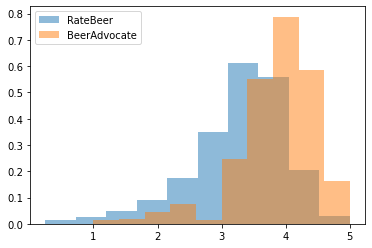

In [7]:
#divide RB by 4 
plt.hist(ratings_rb['overall']/4, density=True, label='RateBeer', alpha=0.5)
plt.hist(ratings_ba['overall'], density=True, label='BeerAdvocate', alpha=0.5)
#plt.hist(overall_merged, density=True, label='together', histtype='step')
plt.legend()

In [13]:
scipy.stats.ttest_ind(ratings_rb['overall']/4, ratings_ba['overall'])

Ttest_indResult(statistic=-995.3389223646539, pvalue=0.0)

We can conclude we should treat them separately since they don't seem to be from the same distribution

In [15]:
overall = pd.concat([ratings_rb['overall']/4, ratings_ba['overall']], axis=1)
overall.columns = ['RateBeer', 'BeerAdvocate']
print('Skew:')
print(overall.skew())
overall.describe()

Skew:
RateBeer       -1.000105
BeerAdvocate   -1.090974
dtype: float64


,RateBeer,BeerAdvocate
count,7.122074e+06,2.672676e+06
mean,3.303826e+00,3.846609e+00
std,7.880102e-01,6.806139e-01
min,2.500000e-01,1.000000e+00
25%,3.000000e+00,3.500000e+00
50%,3.500000e+00,4.000000e+00
75%,3.750000e+00,4.250000e+00
max,5.000000e+00,5.000000e+00


### Inter and intra beer

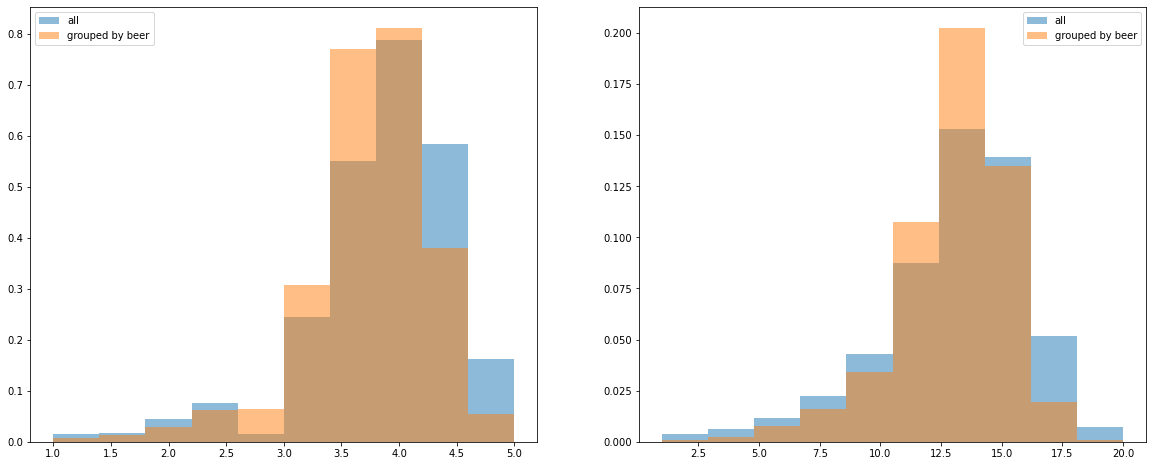

In [35]:
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

ax[0].hist(ratings_ba['overall'], density=True, label='all', alpha=0.5)
ax[0].hist(ratings_ba.groupby(['beer_id'])['overall'].mean(), density=True, label='grouped by beer', alpha=0.5)
ax[0].legend()


ax[1].hist(ratings_rb['overall'], density=True, label='all', alpha=0.5)
ax[1].hist(ratings_rb.groupby(['beer_id'])['overall'].mean(), density=True, label='grouped by beer', alpha=0.5)
ax[1].legend()

In [39]:
print('mean.median(), mean.mean()')
print(ratings_ba.groupby(['beer_id'])['overall'].mean().median(), ratings_ba.groupby(['beer_id'])['overall'].mean().mean())

mean.median(), mean.mean()
3.8 3.734276390910674


In [40]:
print('std.median(), std.mean()')
print(ratings_ba.groupby(['beer_id'])['overall'].std().median(), ratings_ba.groupby(['beer_id'])['overall'].std().mean())

std.median(), std.mean()
0.41669354665301606 0.4558683174106973


### Date

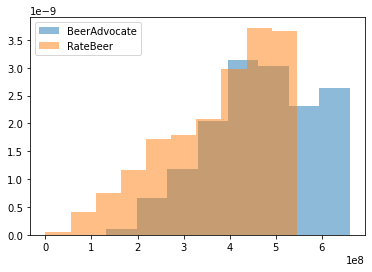

In [44]:
plt.hist(ratings_ba['date']-ratings_ba['date'].min(), density=True, alpha=0.5, label='BeerAdvocate')
plt.hist(ratings_rb['date']-ratings_rb['date'].min(), density=True, alpha=0.5, label='RateBeer')
plt.legend()

# Users

### Number of reviews

In [21]:
users_ba = pd.read_csv('Data/BeerAdvocate/users.csv')
users_ba

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [22]:
users_rb = pd.read_csv('Data/RateBeer/users.csv')
users_rb

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


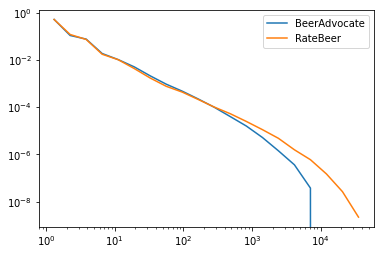

In [82]:
bins = np.logspace(np.log10(min(users_ba['nbr_reviews'].min(), users_rb['nbr_ratings'].min())+1) ,np.log10(max((users_ba['nbr_reviews'].max(), users_rb['nbr_ratings'].max()))), 21)
centers = [np.sqrt(bins[i]*bins[i+1]) for i in range(len(bins)-1)]
hist_ba, edges = np.histogram(users_ba['nbr_reviews'], bins=bins, density=True)
hist_rb, edges = np.histogram(users_rb['nbr_ratings'], bins=bins, density=True)

plt.loglog(centers, hist_ba, label='BeerAdvocate')
plt.loglog(centers, hist_rb, label='RateBeer')
plt.legend()

!!! THEY ARE BOTH POWER LAWS !!!

### Nationality

In [24]:
users_ba['location'].nunique()

194

In [25]:
users_rb['location'].nunique()

222

##### How much USA?

In [40]:
users_ba['location'].str.contains('United States').sum()/len(users_ba)

0.7366301462551398

74% of all users of BeerAdvocate are from USA (we can assume a comparable percentage of the reviews as well)

In [42]:
users_rb['location'].str.contains('United States').sum()/len(users_rb)

0.3826915951777011

38% of all users of RateBeer are from USA (we can assume a comparable percentage of the reviews as well)

### When did they join the website

<AxesSubplot:>

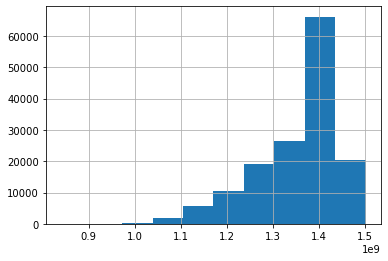

In [43]:
users_ba['joined'].hist()

<AxesSubplot:>

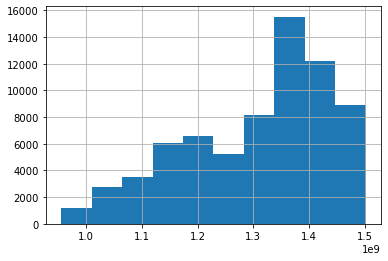

In [44]:
users_rb['joined'].hist()

# Breweries

In [45]:
brew_ba = pd.read_csv('Data/BeerAdvocate/breweries.csv')
brew_ba

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [46]:
brew_rb = pd.read_csv('Data/RateBeer/breweries.csv')
brew_rb

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1


### location

In [47]:
brew_ba['location'].nunique()

297

In [49]:
brew_rb['location'].nunique()

267

In [52]:
brew_ba.groupby(['location']).count()['id'].sort_values(ascending=False)

location
Germany                                                                     1431
England                                                                      997
United States, California                                                    929
Canada                                                                       775
United States, Washington                                                    411
                                                                            ... 
Illinois</a>, 60614-4939, <a href="/place/directory/9/US/">United States       1
Iraq                                                                           1
Lesotho                                                                        1
Liberia                                                                        1
Palau                                                                          1
Name: id, Length: 297, dtype: int64

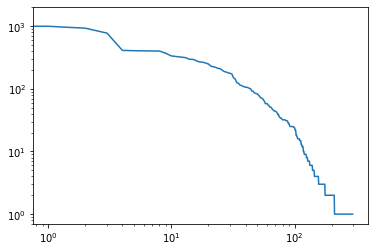

In [59]:
plt.loglog(np.arange(len(brew_ba.groupby(['location']).count()['id'].sort_values(ascending=False))), brew_ba.groupby(['location']).count()['id'].sort_values(ascending=False))

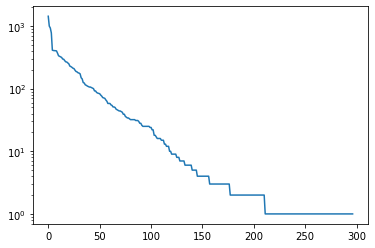

In [60]:
plt.semilogy(np.arange(len(brew_ba.groupby(['location']).count()['id'].sort_values(ascending=False))), brew_ba.groupby(['location']).count()['id'].sort_values(ascending=False))

It is a hybrid between power law and exponential